# <a href="https://thetahat.ru/">BioMed@DataScience</a>

# Логистическая регрессия

## Семинар 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_bmds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

In [126]:
# Bot check

# HW_ID: bmds_sem5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set_theme(style='dark', font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

### Задача 1

#### Биология: [датасет](https://www.kaggle.com/datasets/medelbachirkhellaf/anemia-easylevel) на  анемию и лабораторные тесты

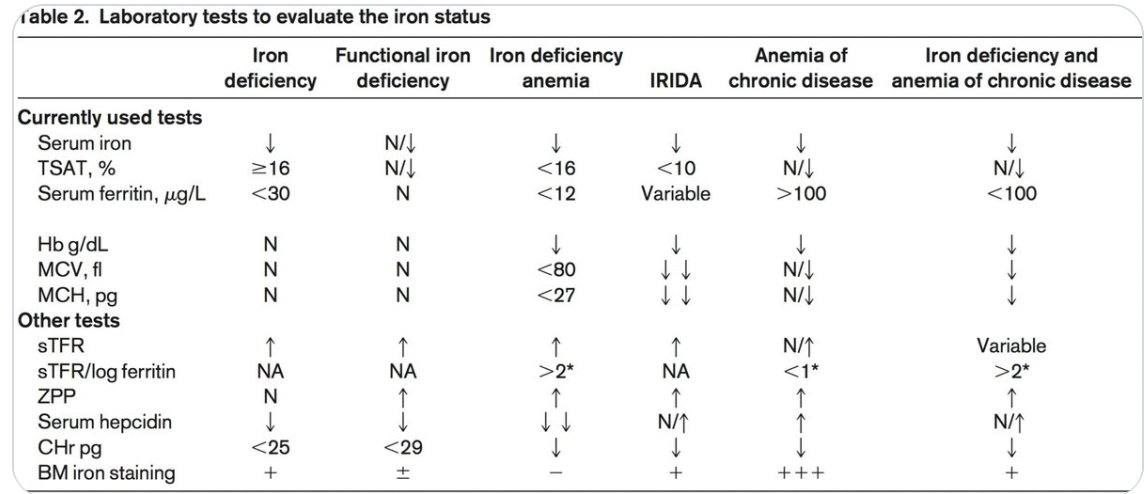  

Анемия — это состояние, при котором уровень гемоглобина в крови ниже нормы. Гемоглобин — это белок в эритроцитах, который переносит кислород из лёгких в ткани и органы. Анемия может быть вызвана различными причинами, включая <abbr title="Железо является ключевым компонентом гемоглобина">дефицит железа</abbr>, <abbr title="Воспалительные процессы могут нарушать использование железа и производство эритроцитов">хронические заболевания</abbr>, <abbr title="Острые или постоянные кровотечения приводят к прямой потере эритроцитов">кровопотери</abbr>, <abbr title="Наследственные или приобретенные нарушения в структуре или синтезе гемоглобина">нарушения синтеза гемоглобина</abbr>.

На изображении представлены лабораторные тесты, которые используются для оценки состояния железа и диагностики анемии. Вот краткое объяснение ключевых показателей:

### Ключевые показатели:

- **Serum iron (Сывороточное железо)**:
  - Количество железа, циркулирующего в крови в данный момент. Низкий уровень указывает на дефицит железа.
  - Нормальные значения: Мужчины: 60–170 мкг/дл, Женщины: 50–170 мкг/дл.

- **TSAT (Transferrin Saturation, %)**:
  - Трансферрин - это транспортный белок, который доставляет железо к клеткам костного мозга для синтеза гемоглобина. TSAT показывает, насколько насыщен трансферрин железом.
  - Низкий уровень (<16%) указывает на дефицит железа.

- **Serum ferritin (Сывороточный ферритин)**:
  - Показывает запасы железа в организме.
  - Низкий уровень (<30 мкг/л) указывает на дефицит железа.

#### Примеры использования в таблице:

| Показатель                  | Описание                                                                 |
|-----------------------------|--------------------------------------------------------------------------|
| **Сывороточное железо (Serum iron)** | ↓ — снижено при железодефиците и железодефицитной анемии.              |
|                             | N↓↓ — может быть нормальным или значительно сниженным при функциональном дефиците железа. |
| **Ферритин (Serum ferritin)**       | <30 — снижен при железодефиците.                                        |
|                             | >100 — повышен при анемии хронических заболеваний.                    |
| **Гемоглобин (Hb)**         | ↓ — снижен при анемии.                                                  |
|                             | N — нормальный уровень, если анемия отсутствует.                        |
| **MCV (Mean Corpuscular Volume)**   | <80 — снижен (микроцитоз) при железодефицитной анемии.                 |
|                             | N — нормальный при отсутствии анемии.                                   |  


Подробнее с типами и их особенностями можно ознакомиться [тут](https://ashpublications.org/hematology/article/2015/1/8/20735/Iron-deficiency-new-insights-into-diagnosis-and).


<!DOCTYPE html>
<body>
    <h1>Описание датасета</h1>
    <p><p>
    <p>1. <strong>Hemoglobin</strong>: это белок в красных кровяных тельцах (эритроцитах), который отвечает за перенос кислорода из лёгких в ткани и органы, а также за возврат углекислого газа обратно в лёгкие.</p>
    <p>Нормальные значения:</p>
    <ul>
        <li>Мужчины: 13.8&mdash;17.2 г/дл</li>
        <li>Женщины: 12.1&mdash;15.1 г/дл</li>
    </ul>
    <p>2. <strong>MCH (Mean Corpuscular Hemoglobin)</strong>: показывает среднее количество гемоглобина в одном эритроците.</p>
    <p>3. <strong>MCHC (Mean Corpuscular Hemoglobin Concentration)</strong>: показывает среднюю концентрацию гемоглобина в единице объёма эритроцитов.</p>
    <p>4. <strong>MCV (Mean Corpuscular Volume)</strong>: показывает средний объём одного эритроцита.</p>
    <p>5. <strong>GENDER (Пол)</strong>: указывает пол пациента (мужской или женский). В данном датасете пол уже закодирован как 0 и 1.</p>
    <p>6. <strong>IDENTIFICATION (Идентификация)</strong>: уникальный идентификатор пациента, который указывает на наличие/отсутствие заболевания.</p>
    <p>Как можно заметить, наши данные используются в классификации и выявлении различных типов анемии из реальной жизни.</p>
</body>
</html>


## 1. Загрузка датасета

Cкачаем [датасет](https://www.kaggle.com/datasets/medelbachirkhellaf/anemia-easylevel) о предсказании наличия анемии у пациента.

Мы будем работать только с файлом `Test_Anemia.csv`.  

> <details>
>  <summary>Если загрузили .zip файл в среду</summary>
>  Воспользуйтесь приведенной ниже командой, она достанет нужный файл в среду `/content/`
>
>  !unzip `/content/archive.zip`
> </details>

In [128]:
data = pd.read_csv("Test_Anemia.csv")

Посмотрим на вид датасета и на типы данных, содержащихся в нем

In [129]:
data.head()

,Hemoglobin,MCH,MCHC,MCV,GENDER,IDENTIFICATION
0,14.9,22.7,29.1,83.7,1,0
1,15.9,25.4,28.3,72.0,0,0
2,9.0,21.5,29.6,71.2,0,1
3,14.9,16.0,31.4,87.5,0,0
4,14.7,22.0,28.2,99.5,1,0


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hemoglobin      1421 non-null   float64
 1   MCH             1421 non-null   float64
 2   MCHC            1421 non-null   float64
 3   MCV             1421 non-null   float64
 4   GENDER          1421 non-null   int64  
 5   IDENTIFICATION  1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [131]:
data.describe()

,Hemoglobin,MCH,MCHC,MCV,GENDER,IDENTIFICATION
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,13.412738,22.905630,30.251232,85.523786,0.520760,0.436312
std,1.974546,3.969375,1.400898,9.636701,0.499745,0.496102
min,6.600000,16.000000,27.800000,69.400000,0.000000,0.000000
25%,11.700000,19.400000,29.000000,77.300000,0.000000,0.000000
50%,13.200000,22.700000,30.400000,85.300000,1.000000,0.000000
75%,15.000000,26.200000,31.400000,94.200000,1.000000,1.000000
max,16.900000,30.000000,32.500000,101.600000,1.000000,1.000000


## 2. Предобработка данных

В этом предобработанном датасете отсутствуют пропуски, как видно из информации `data.info()`, если бы были пропуски, значения Non-Null Count в таблице выше не были бы равны для всех столбцов в `data` и, непосредственно,  размеру датасета. Однако, на будущее, важно проверять данные на пропуски, это можно сделать с помощью следующего метода.

In [132]:
data.isna().sum()

,0
Hemoglobin,0
MCH,0
MCHC,0
MCV,0
GENDER,0
IDENTIFICATION,0


Чтобы удобнее было работать с данными, переведем все названия признаков в нижний регистр.  

> <details>
>  <summary>Подсказка</summary>
>  Можно воспользоваться методом `.lower()`
> </details>

In [133]:
data.columns = data.columns.str.lower()

Разбейте наши данные на `features` $(X)$ &mdash; данные для обучения, и `target` $(Y)$ &mdash;предсказываемая переменная.

In [134]:
X = data.drop('identification', axis=1)
y = data['identification']

## 3. Графики

Проведем визуальный анализ данных. Построим оценки плотности по каждому признаку отдельно для каждого класса.  
1. Какие признаки лучше всего разделяют классы?  
2. Как это отразится на результатах модели?
3. Что можно сказать о распределении для признака GENDER?

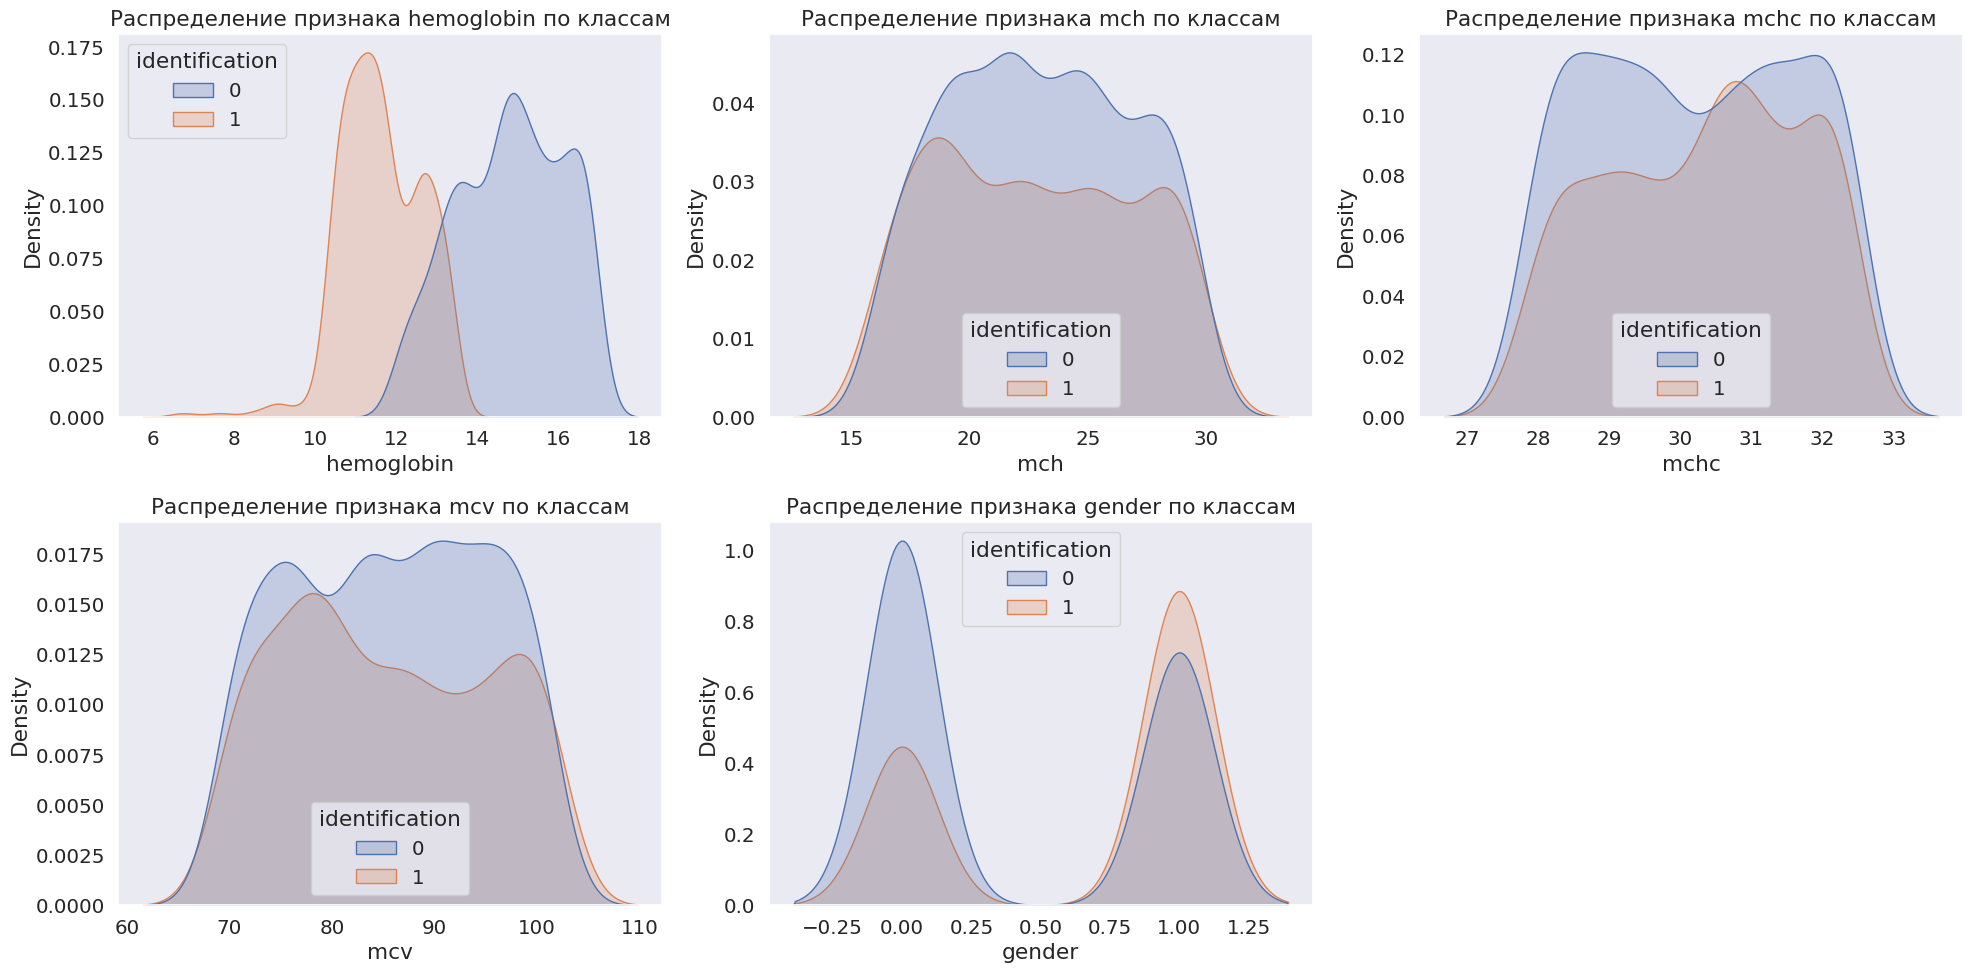

In [135]:
# Определим количество признаков
num_features = len(X.columns)

# Определим количество строк и столбцов для subplot
num_cols = 3  # Количество столбцов
num_rows = (num_features + num_cols - 1) // num_cols  # Количество строк

# Создаем фигуру и сетку подграфиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Плоский список осей для удобства итерации
axes = axes.flatten()

# Построение графиков плотности для каждого признака
for i, feature in enumerate(X.columns):
    sns.kdeplot(data=data, x=feature, hue="identification", fill=True, ax=axes[i])
    axes[i].set_title(f'Распределение признака {feature} по классам')

# Удаляем лишние оси, если их больше, чем признаков
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Показываем графики
plt.tight_layout()
plt.show()



**Ответ:**
Какие признаки лучше всего разделяют классы?
- признак hemoglobin лучше всего разделяет классы, т.к. пики 0 (нет анемии) и 1 (есть анемия) находятся в разных областях и в целом графики плотности мало пересекаются друг с другом.

Как это отразится на результатах модели?
- признак hemoglobin будет основным по определению наличия/отсутствия заболевания, модель будет работать более менее точно, разделяя именно по этому признаку


Что можно сказать о распределении для признака GENDER?
- Для признака gender распределение выглядит неинформативно, т.к. не видно распределения по полу, нужно использовать другие методы визуализации.

Поскольку для признака gender распределение выглядит не очень информативно, визуализируем его с помощью `barplot`

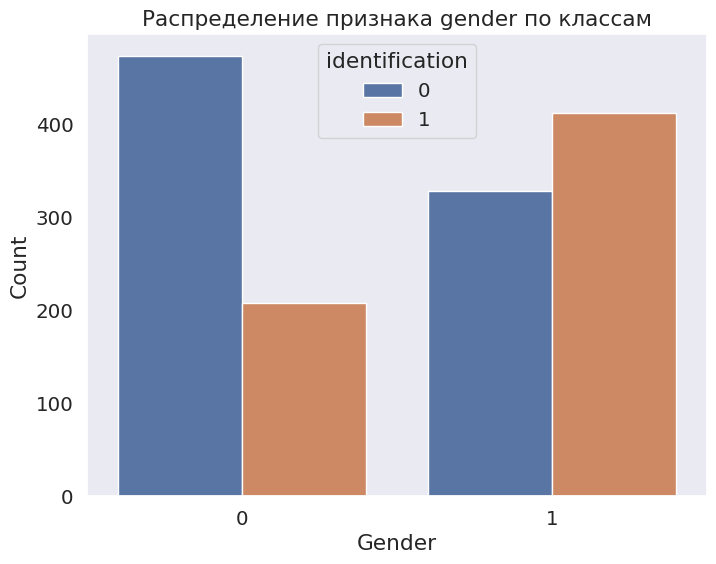

In [136]:
# Визуализация распределения признака 'gender' с помощью barplot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue='identification')

# Добавляем заголовок и метки осей
plt.title('Распределение признака gender по классам')
plt.xlabel('Gender')
plt.ylabel('Count')

# Показываем график
plt.show()

## 4. Разделим датасет и обучим модель

Создайте и обучите логистическую регрессию. Укажите `fit_intercept` &mdash; `True` и `penalty` &mdash; `None`.

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
model = LogisticRegression(fit_intercept=True, penalty=None)
model.fit(X_train, y_train)

LogisticRegression(penalty=None)

Напечатайте коэффициенты модели. О чём говорят знаки `+` и `-`?

In [139]:
coefficients = model.coef_
intercept = model.intercept_

feature_names = X.columns  # Замените на ваши названия признаков
coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=['weights'])

# Добавляем свободный член в DataFrame
coef_df.loc['intercept'] = intercept

print(coef_df)

                weights
hemoglobin  -163.590064
mch            0.449628
mchc           0.783544
mcv            0.104605
gender       245.140369
intercept   1913.042714


**Выводы:** положительные коэффициенты увеличивают вероятность развития анемии, а отрицательные понижают. Само значение показывает, насколько выше/ниже риск развития анемии. Тем самым увеличение гемоглобина сильно снижает риск развития анемии (-163.6), что логично, т.к. анемия развивается при недостатке гемоглобина. А вот остальные параметры уже развивают её, но не так значительно (значительно только пол).

## 5. Проверим качество модели

Для  объектов из тестовой выборки оцените вероятность наличия анемии, при помощи метода [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Выведите эти значения, а также итоговые предсказания модели методом `predict`

In [140]:
y_pred = model.predict(X_test)
probabilities = model.predict_proba(X_test)
# Выводим вероятности и предсказания
results_df = pd.DataFrame({
    'Object': range(1, len(X_test) + 1),
    'Probability_Class_0': probabilities[:, 0],
    'Probability_Class_1': probabilities[:, 1],
    'Prediction': y_pred
})

# Выводим DataFrame
results_df.head()

,Object,Probability_Class_0,Probability_Class_1,Prediction
0,1,0.000000,1.000000e+00,1
1,2,1.000000,3.456408e-202,0
2,3,0.995732,4.268491e-03,0
3,4,1.000000,1.434328e-280,0
4,5,0.000000,1.000000e+00,1


Теперь проверим качество нашей модели. Посчитайте его на тестовой выборке при помощи метрики Accuracy, показывающей долю правильных предсказаний:
$$
      Accuracy(Y, \widehat{Y}) = \frac{1}{n}\sum^{n}_{i = 1} I\{\widehat{Y}_{i} = Y_i\}
$$

In [141]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

**Выводы:** доля правильных предсказаний 100% 🤙 Модель прекрасно работает!!!


---
© 2025 команда <a href="https://thetahat.ru/">ThetaHat</a> для BioMed@DataScience